In [1]:
import cv2
import numpy as np
from scipy.ndimage import rotate
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

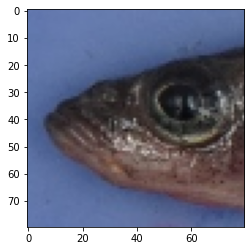

In [146]:
image1 = cv2.imread('../data/templates/1.png')
template1 = image1[20:100, 15:95]
# cv2.imwrite("../data/templates/head1.png", template1)

image2 = cv2.imread('../data/templates/2.png')
template2 = image2[20:100, 15:95]
# cv2.imwrite("../data/templates/head2.png", template2)

image3 = cv2.imread('../data/templates/3.png')
template3 = cv2.resize(image3[30:130, 10:110], (80, 80))
# cv2.imwrite("../data/templates/head3.png", template3)

image4 = cv2.imread('../data/CC Lake slice/DSC00843.jpg')
template4 = cv2.resize(cv2.flip(image4, 0)[125:225, 180:280], (80, 80))
# cv2.imwrite("../data/templates/head4.png", template4)

image5 = cv2.imread('../data/CC Lake slice/DSC00849.jpg')
template5 = cv2.resize(cv2.flip(image5, 0)[100:200, 220:320], (80, 80))
# cv2.imwrite("../data/templates/head5.png", template5)
plt.imshow(cv2.cvtColor(template4, cv2.COLOR_BGR2RGB))

In [117]:
def match(image, temp0, slow=0.8, shigh=1.21, method = cv2.TM_CCORR_NORMED): 
    img = np.copy(image)
    best_res = None
    best_score = 0
    for s in np.arange(slow, shigh, 0.05):
        temp = cv2.resize(temp0, None, fx = s, fy = s)
        if image.shape[0] < temp.shape[0]: 
            break
        res = cv2.matchTemplate(image, temp, method)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res, None)
        if res.max() >= best_score:
            best_score = res.max()
            output = (best_score, maxLoc, temp, res, s)

    return output

In [119]:
def multitemp_match(image, templst): 
    tempscores = []
    temps = []
    Locs = []
    scales = []
    # output = (best_score, maxLoc, temp, res, s)
    for temp0 in templst: 
        output = match(image, temp0, method = cv2.TM_CCORR_NORMED)
        tempscores.append(output[0])
        temps.append(output[2])
        Locs.append(output[1])
        scales.append(output[4])
    
    idx = np.array(tempscores).argmax()
    score = tempscores[idx]
    Loc = Locs[idx]
    temp = temps[idx]
    scale = scales[idx]
    return score, Loc, temp, idx, scale

In [120]:
def get_templst(): 
    temp_path = '../data/templates/'
    temp_names = ['head1.png', 'head2.png', 'head3.png', 'head4.png', 'head5.png']
    templst = []
    for i in temp_names: 
        templst.append(cv2.imread(join(temp_path, i)))
#     print(templst)
    return templst

0.99495023 4 1.2000000000000004
0.97808915 1 0.9500000000000002
0.98819053 3 1.2000000000000004
0.97862226 3 1.2000000000000004
0.97858346 3 1.2000000000000004
0.9779198 0 1.2000000000000004
0.98148525 2 1.0500000000000003
0.98240757 3 1.2000000000000004
0.99429107 2 1.2000000000000004
0.9806375 4 1.2000000000000004


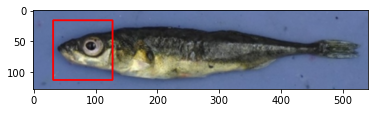

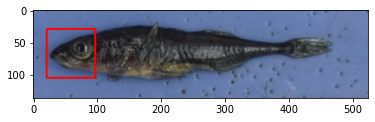

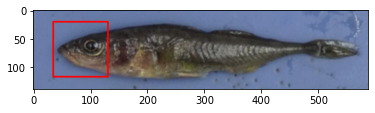

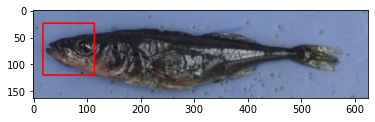

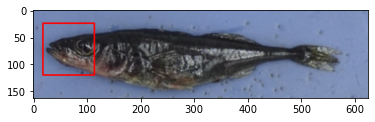

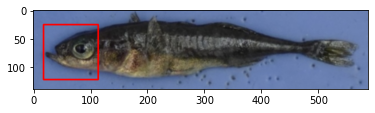

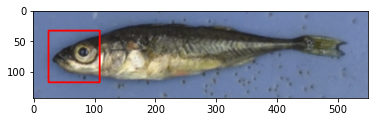

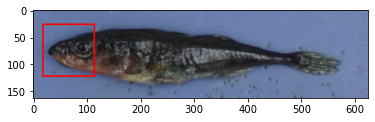

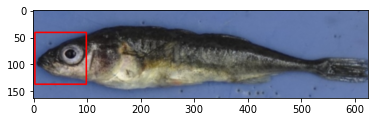

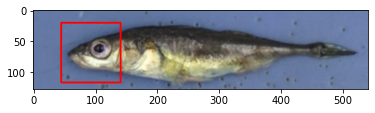

In [147]:
# all templates tested: 
templst = get_templst()

# image = cv2.imread('../data/CC Lake extracted/5/DSC00839.jpg')
# test multiple images
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

# also flip image: 
for f in onlyfiles[10:20]:
    image = cv2.imread(join(path, f))
    img_in = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
    
    best_score = 0
    best_img = None
    best_Loc, best_temp = None, None
    best_idx, best_scale = None, None
    left_img = cv2.flip(img_in, 0)
    up_img = cv2.flip(img_in, 1)
    for img in [img_in, left_img, left_img]: 
        score, Loc, temp, idx, scale = multitemp_match(img, templst)
        if score > best_score: 
            best_score = score
            best_img = img
            best_Loc = Loc
            best_temp = temp
            best_idx = idx
            best_scale = scale
    print(best_score, best_idx, best_scale)
    # image_out = cv2.rectangle(image, Loc, Loc, (0, 0, 255), 2)
    image_out = cv2.rectangle(best_img, best_Loc, (best_Loc[0]+best_temp.shape[1], best_Loc[1]+best_temp.shape[0]), (0, 0, 255), 2)

    fig, (ax2) = plt.subplots(1, 1)
#     ax0.imshow(temp, cmap = plt.cm.gray)
    # ax1.imshow(res, cmap = plt.cm.gray)
    ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB)) 

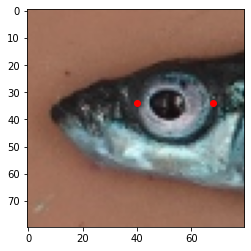

In [153]:
# mark eye landmarks on templates
templst = get_templst()

temp = templst[0]
lm1 = [35, 41]
lm2 = [35, 74]

temp = templst[1]
lm1 = [34, 40]
lm2 = [34, 75]

temp = templst[2]
lm1 = [34, 41]
lm2 = [34, 75]

temp = templst[3]
lm1 = [34, 41]
lm2 = [34, 75]

temp = templst[4]
lm1 = [34, 40]
lm2 = [34, 68]

plt.figure()
plt.imshow(temp)
plt.plot(lm1[1], lm1[0],  c='red', marker='o')
plt.plot(lm2[1], lm2[0],  c='red', marker='o')

In [154]:
def get_eyelm(idx): 
    if idx == 0: 
        return ([35, 41], [35, 74])
    elif idx == 1: 
        return ([34, 40], [34, 75])
    elif idx == 2 or idx == 3: 
        return ([34, 41], [34, 75])
    elif idx == 4: 
        return ([34, 40], [34, 68])
    else: 
        return None

0.99495023 4 1.2000000000000004
[34, 40] [34, 68]
0.97808915 1 0.9500000000000002
[34, 40] [34, 75]
0.98819053 3 1.2000000000000004
[34, 41] [34, 75]
0.97862226 3 1.2000000000000004
[34, 41] [34, 75]
0.97858346 3 1.2000000000000004
[34, 41] [34, 75]
0.9779198 0 1.2000000000000004
[35, 41] [35, 74]
0.98148525 2 1.0500000000000003
[34, 41] [34, 75]
0.98240757 3 1.2000000000000004
[34, 41] [34, 75]
0.99429107 2 1.2000000000000004
[34, 41] [34, 75]
0.9806375 4 1.2000000000000004
[34, 40] [34, 68]
0.9589892 3 1.2000000000000004
[34, 41] [34, 75]
0.973873 1 0.9500000000000002
[34, 40] [34, 75]


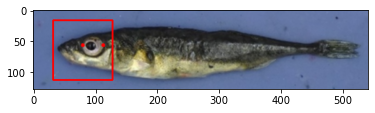

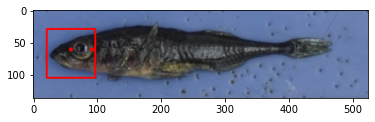

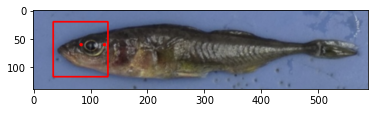

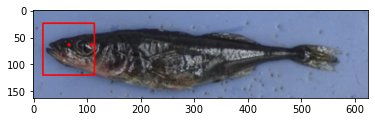

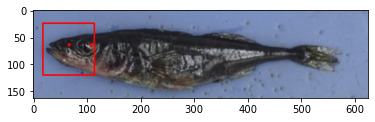

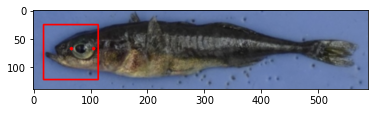

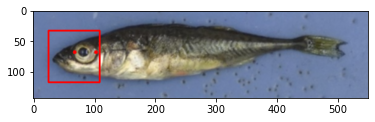

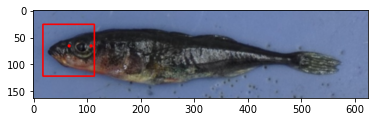

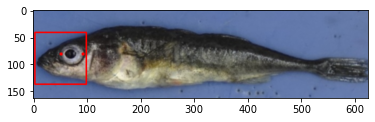

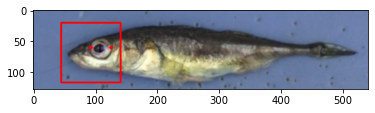

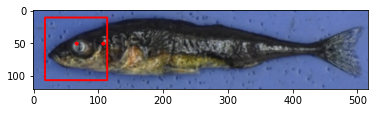

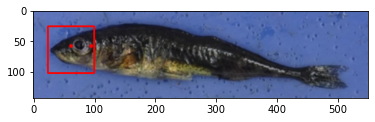

In [174]:
templst = get_templst()
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
# also flip image: 
for f in onlyfiles[10:22]:
    image = cv2.imread(join(path, f))
    img_in = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
    
    best_score = 0
    best_img = None
    best_Loc, best_temp = None, None
    best_idx, best_scale = None, None
    left_img = cv2.flip(img_in, 0)
    up_img = cv2.flip(img_in, 1)
    for img in [img_in, left_img, left_img]: 
        score, Loc, temp, idx, scale = multitemp_match(img, templst)
        if score > best_score: 
            best_score = score
            best_img = img
            best_Loc = Loc
            best_temp = temp
            best_idx = idx
            best_scale = scale
    print(best_score, best_idx, best_scale)
    # get eye landmarks
    lm1, lm2 = get_eyelm(best_idx)
    print(lm1, lm2)
    # get scaled and shifted landmark, in x, y format
    eyelm1 = (best_Loc[0]+int(lm1[1]*best_scale), best_Loc[1]+int(lm1[0]*best_scale))
    eyelm2 = (best_Loc[0]+int(lm2[1]*best_scale), best_Loc[1]+int(lm2[0]*best_scale))
    image_out = cv2.rectangle(best_img, best_Loc, (best_Loc[0]+best_temp.shape[1], best_Loc[1]+best_temp.shape[0]), (0, 0, 255), 2)
    image_out = cv2.circle(image_out, eyelm1, radius=3, color=(0, 0, 255), thickness=-1)
    image_out = cv2.circle(image_out, eyelm2, radius=3, color=(0, 0, 255), thickness=-1)
    fig, (ax2) = plt.subplots(1, 1)
#     ax0.imshow(temp, cmap = plt.cm.gray)
    # ax1.imshow(res, cmap = plt.cm.gray)
    ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB)) 

In [ ]:
# add contours